# Package Imports

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Notebook Setup

In [34]:
continuous_features = [
    'Elevation',
     'Aspect',
     'Slope',
     'Horizontal_Distance_To_Hydrology',
     'Vertical_Distance_To_Hydrology',
     'Horizontal_Distance_To_Roadways',
     'Hillshade_9am',
     'Hillshade_Noon',
     'Hillshade_3pm',
     'Horizontal_Distance_To_Fire_Points'
]

# Data Import

In [8]:
covertype_data = fetch_covtype(as_frame=True)

In [22]:
covertype_df = covertype_data.data
covertype_df['target'] = covertype_data.target

# Content

## Basic Descriptive Stats

In [23]:
covertype_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Plot class distributions

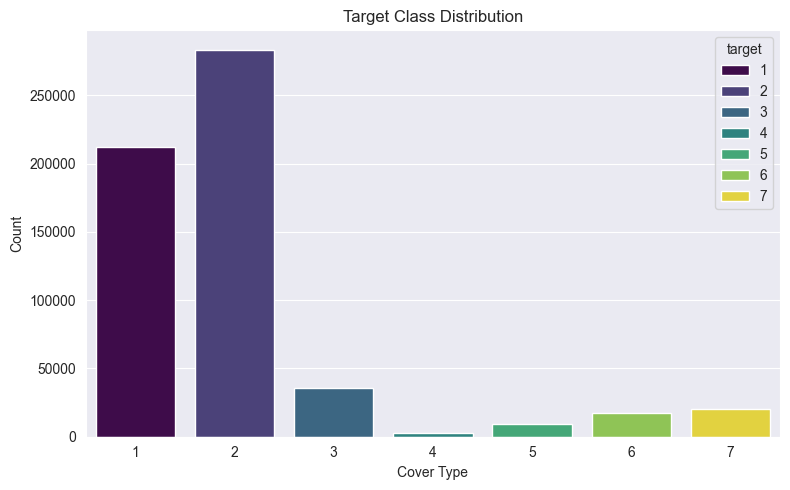

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', hue='target', data=covertype_df, palette='viridis')
plt.title('Target Class Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Correlation Heatmap

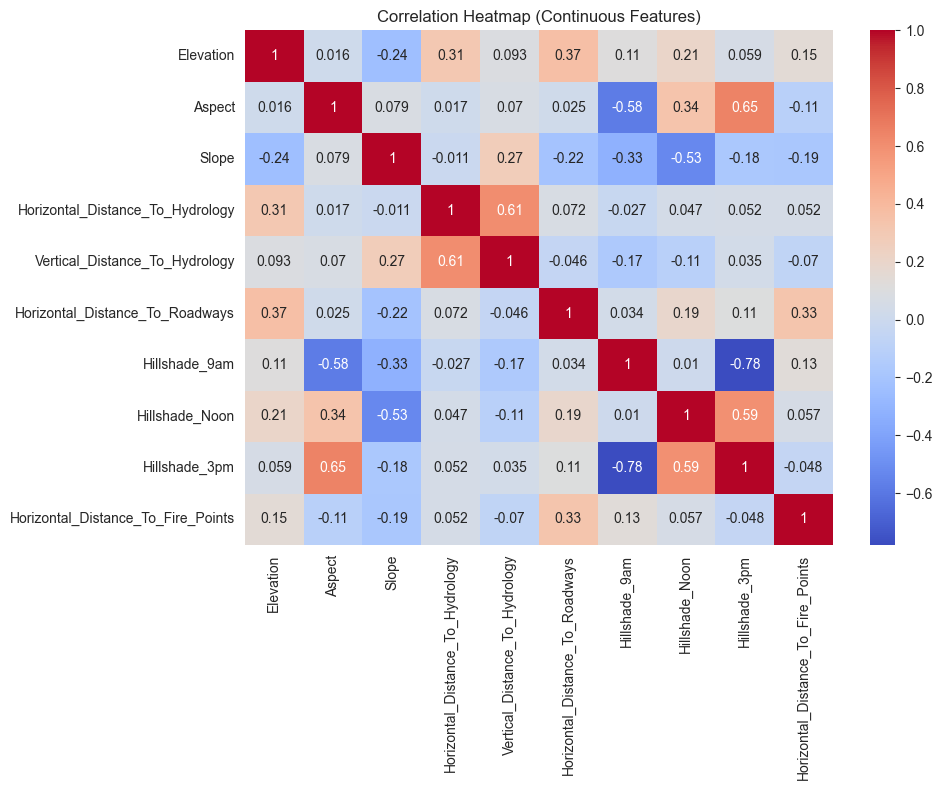

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(covertype_df[continuous_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Continuous Features)')
plt.tight_layout()
plt.show()

## Distribution of Continuous Features

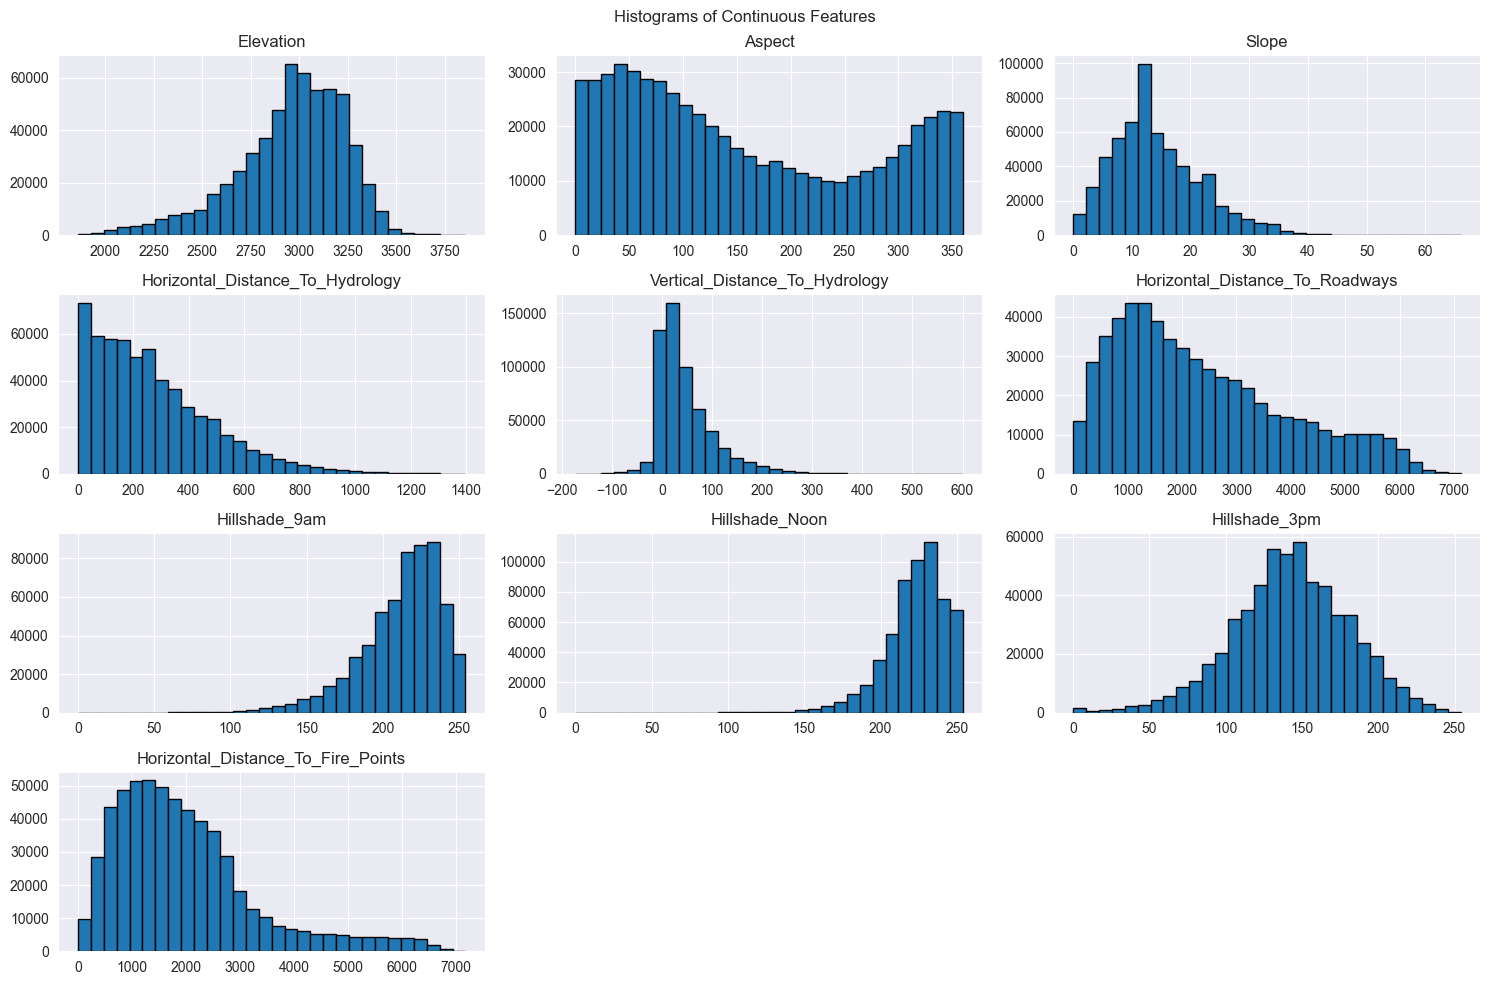

In [35]:
covertype_df[continuous_features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Continuous Features')
plt.tight_layout()
plt.show()

## Boxplots for Continuous Features grouped by Target

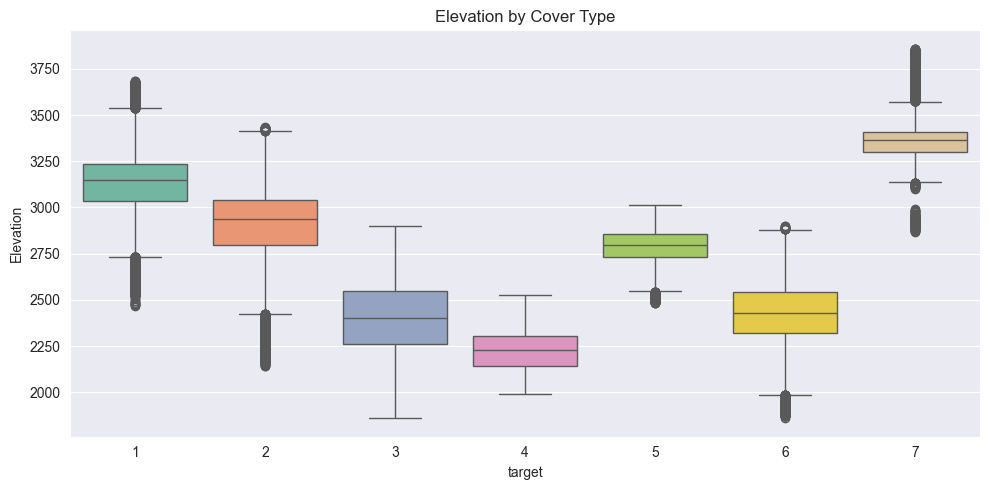

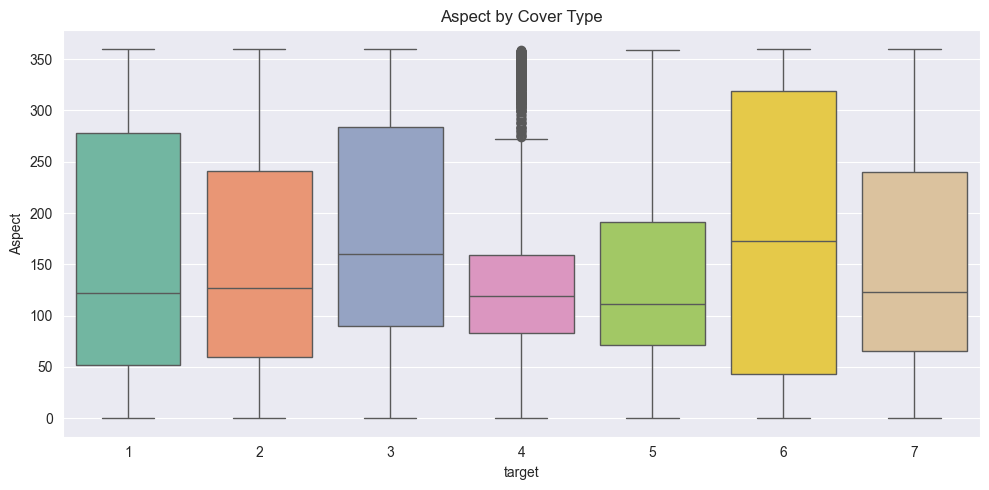

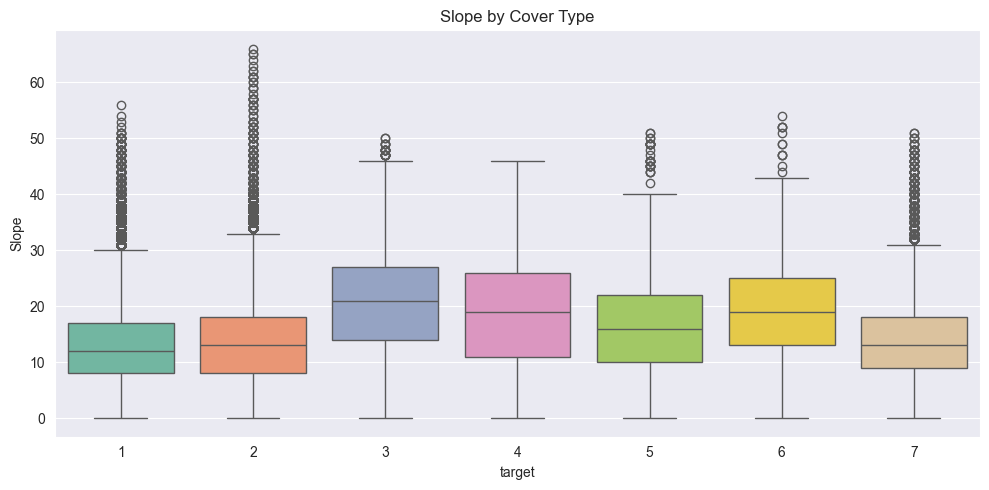

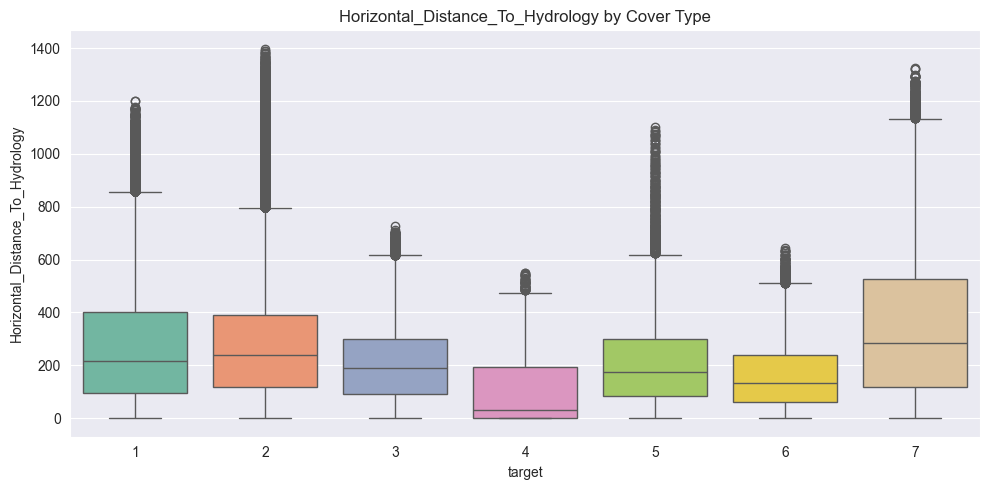

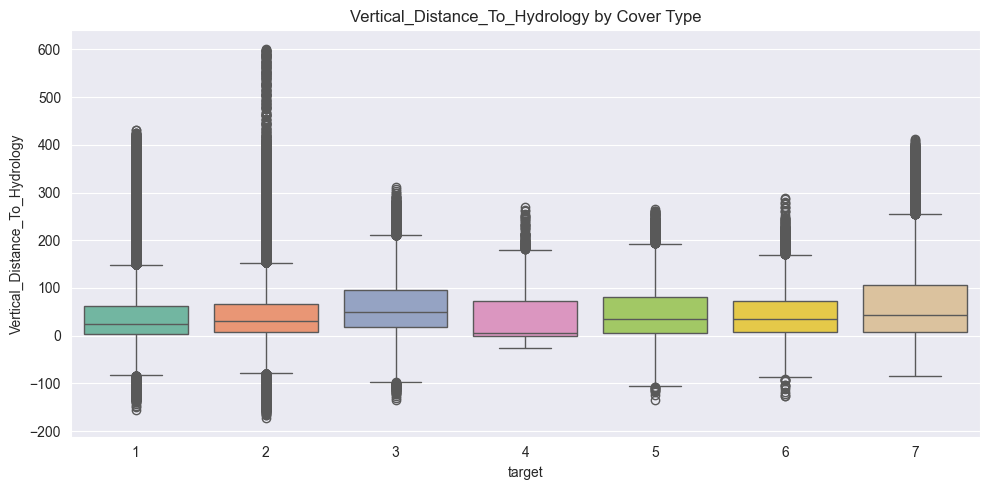

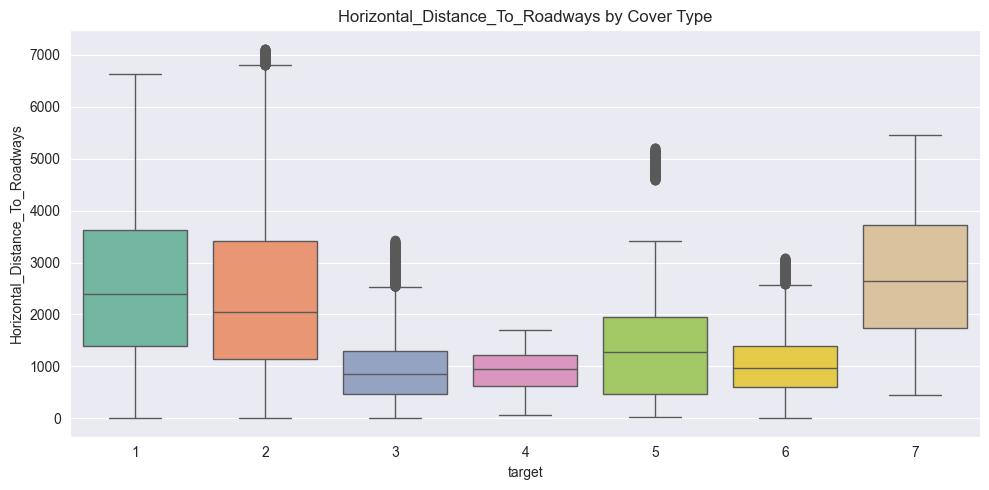

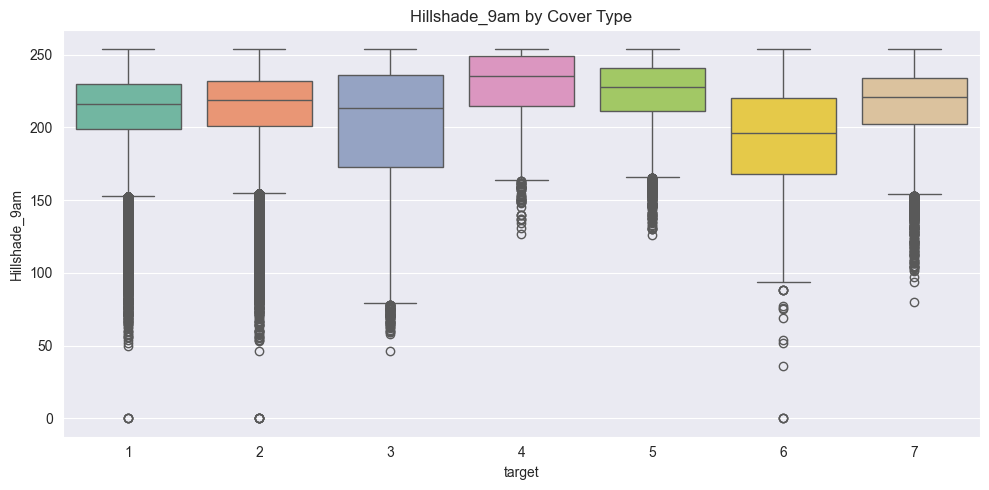

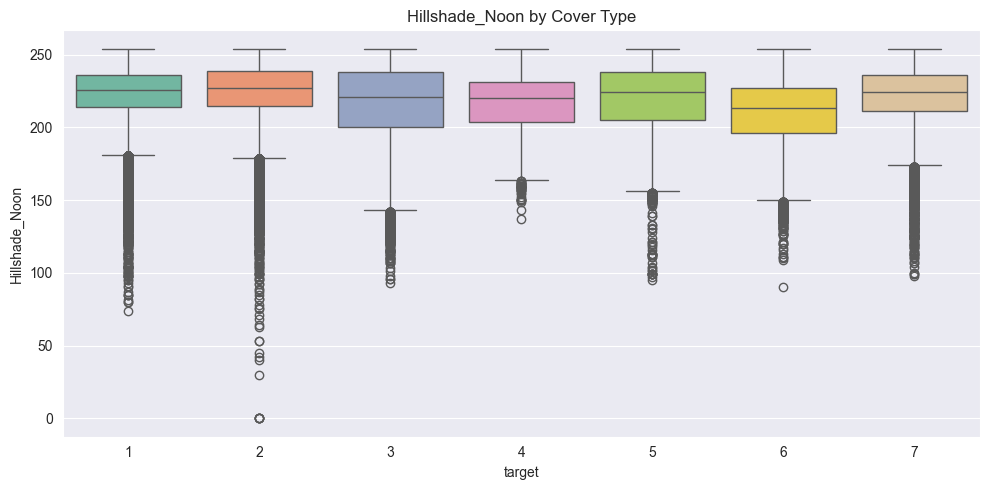

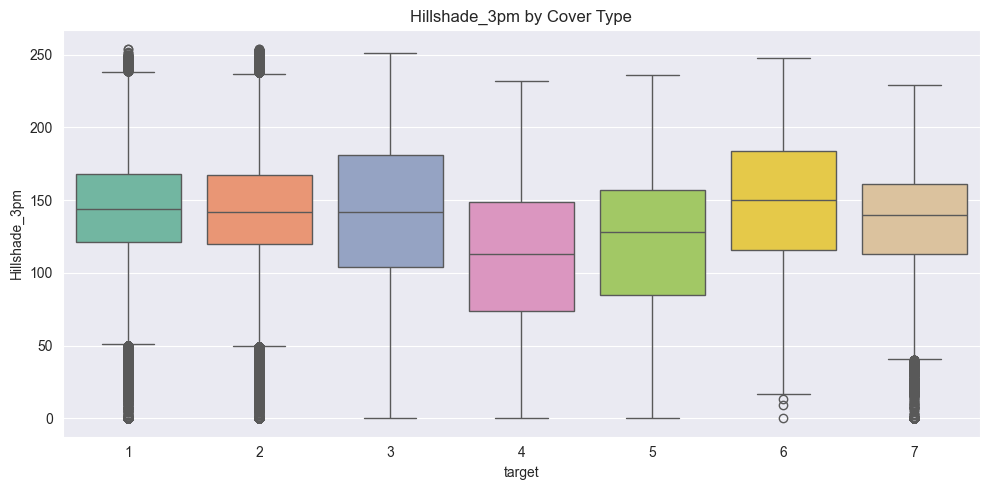

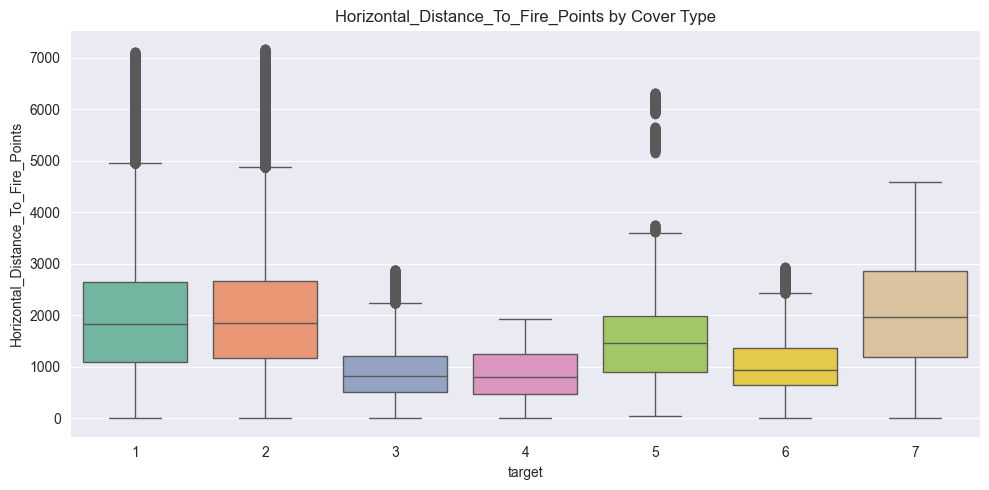

In [37]:
for col in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=col, hue='target', legend=False, data=covertype_df, palette='Set2')
    plt.title(f'{col} by Cover Type')
    plt.tight_layout()
    plt.show()


## Check for missing values

In [38]:
covertype_df.isnull().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


## PCA Visualization

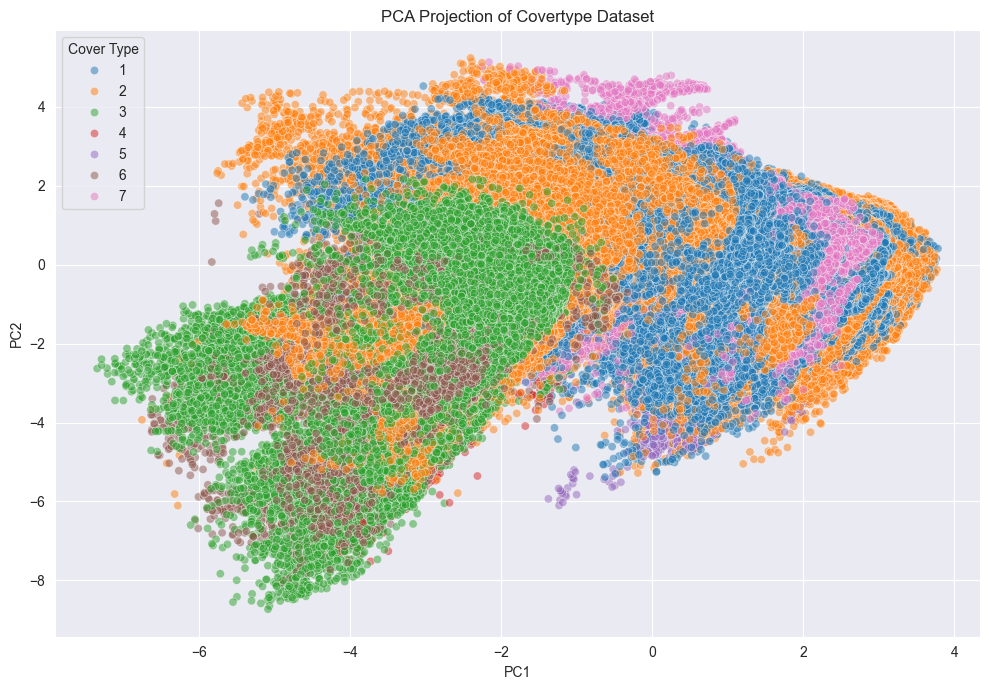

In [41]:
X_scaled = StandardScaler().fit_transform(covertype_df.drop('target', axis=1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=covertype_df['target'], palette='tab10', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cover Type')
plt.tight_layout()
plt.show()
